In [2]:
import torch
import pandas as pd
import tensorflow as tf
import torchvision
import os
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

EPOCHS = 100
BATCH_SIZE = 32
N_EVAL = 100

In [3]:
df_labels = pd.read_csv(r'C:\Users\Chris\AppData\Local\Programs\Python\Python39\Scripts\ACMAI\train.csv')
#print(df_labels)

             image_id  label
0      1000015157.jpg      0
1      1000201771.jpg      3
2       100042118.jpg      1
3      1000723321.jpg      1
4      1000812911.jpg      3
...               ...    ...
21392   999068805.jpg      3
21393   999329392.jpg      3
21394   999474432.jpg      1
21395   999616605.jpg      4
21396   999998473.jpg      4

[21397 rows x 2 columns]


In [ ]:
#send to gpu

if torch.cuda.is_available(): # Check if GPU is available
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

# Move the model to the GPU
# model = model.to(device)
# model

In [ ]:
# Make a Dataset of file names including all the PNG images files in
# the relative image directory.
# filename_dataset = tf.data.Dataset.list_files(r"C:\Users\Chris\AppData\Local\Programs\Python\Python39\Scripts\ACMAI\train_images")

# # Make a Dataset of image tensors by reading and decoding the files.
# image_dataset = filename_dataset.map(lambda x: tf.decode_png(tf.read_file(x)))

# # NOTE: You can add additional transformations, like 
# # `image_dataset.batch(BATCH_SIZE)` or `image_dataset.repeat(NUM_EPOCHS)`
# # in here.

# iterator = image_dataset.make_one_shot_iterator()
# next_image = iterator.get_next()

# # Start a new session to show example output.
# with tf.Session() as sess:

#   try:

#     while True:
#       # Get an image tensor and print its value.
#       image_array = sess.run([next_image])
#       print(image_tensor)

#   except tf.errors.OutOfRangeError:
#     # We have reached the end of `image_dataset`.
#     pass

21397


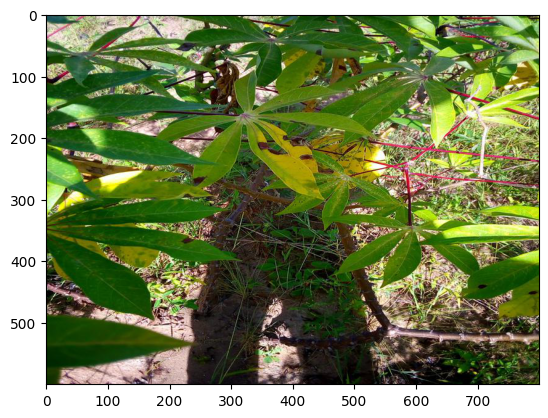

In [4]:
data_dir = (r'C:\Users\Chris\AppData\Local\Programs\Python\Python39\Scripts\ACMAI\train_images')

#filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
filenames = [name for name in os.listdir(data_dir)]

batch_size = len(filenames)
batch = torch.zeros(batch_size, 3, 600, 800, dtype=torch.uint8)
for i, filename in enumerate(filenames):
    batch[i] = torchvision.io.read_image(os.path.join(data_dir, filename))

print(batch_size)

import matplotlib.pyplot as plt

plt.imshow(batch[0].permute(1, 2, 0))
# fig = plt.figure(figsize=(8, 2))
# for i in range(batch.shape[0]) :
#     ax = fig.add_subplot(1, 3, i+1)
#     ax.imshow(batch[i].permute(1, 2, 0))


In [ ]:
class StartingDataset(torch.utils.data.Dataset):
    """
    Dataset that contains 100000 3x224x224 black images (all zeros).
    Need 800x600
    """

    def __init__(self, labels, items):
        self.labels = labels
        self.items = items
        pass

    def __getitem__(self, index):
        image = self.item[index]
        label = self.labels[index]
        return image, label

    def __len__(self):
        return len(self.item)


In [ ]:



class StartingNetwork(torch.nn.Module):
    """
    Basic logistic regression on 224x224x3 images.
    """

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(800 * 600 * 3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x


In [ ]:



def starting_train(train_dataset, val_dataset, model, hyperparameters, n_eval):
    """
    Trains and evaluates a model.

    Args:
        train_dataset:   PyTorch dataset containing training data.
        val_dataset:     PyTorch dataset containing validation data.
        model:           PyTorch model to be trained.
        hyperparameters: Dictionary containing hyperparameters.
        n_eval:          Interval at which we evaluate our model.
    """

    # Get keyword arguments
    batch_size, epochs = hyperparameters["batch_size"], hyperparameters["epochs"]

    # Initialize dataloaders
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=batch_size, shuffle=True
    )

    # Initalize optimizer (for gradient descent) and loss function
    optimizer = optim.Adam(model.parameters())
    loss_fn = nn.CrossEntropyLoss()

    step = 0
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1} of {epochs}")

        # Loop over each batch in the dataset
        for batch in tqdm(train_loader):
            # TODO: Backpropagation and gradient descent

            # Periodically evaluate our model + log to Tensorboard
            if step % n_eval == 0:
                # TODO:
                # Compute training loss and accuracy.
                # Log the results to Tensorboard.

                # TODO:
                # Compute validation loss and accuracy.
                # Log the results to Tensorboard.
                # Don't forget to turn off gradient calculations!
                evaluate(val_loader, model, loss_fn)

            step += 1

        print()


def compute_accuracy(outputs, labels):
    """
    Computes the accuracy of a model's predictions.

    Example input:
        outputs: [0.7, 0.9, 0.3, 0.2]
        labels:  [1, 1, 0, 1]

    Example output:
        0.75
    """

    n_correct = (torch.round(outputs) == labels).sum().item()
    n_total = len(outputs)
    return n_correct / n_total


def evaluate(val_loader, model, loss_fn):
    """
    Computes the loss and accuracy of a model on the validation dataset.

    TODO!
    """
    pass


In [ ]:
import os

import constants
from data.StartingDataset import StartingDataset
from networks.StartingNetwork import StartingNetwork
from train_functions.starting_train import starting_train


def main():
    # Get command line arguments
    hyperparameters = {"epochs": constants.EPOCHS, "batch_size": constants.BATCH_SIZE}

    # TODO: Add GPU support. This line of code might be helpful.
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    print("Epochs:", constants.EPOCHS)
    print("Batch size:", constants.BATCH_SIZE)

    # Initalize dataset and model. Then train the model!
    train_dataset = StartingDataset()
    val_dataset = StartingDataset()
    model = StartingNetwork()
    starting_train(
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        model=model,
        hyperparameters=hyperparameters,
        n_eval=constants.N_EVAL,
    )


if __name__ == "__main__":
    main()
